# Imports para o Projeto

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re

from ydata_profiling import ProfileReport
import sweetviz as sv

# Abrindo e limpando o CSV

In [95]:
df = pd.read_csv("./data/test.csv", na_values=[' ', '_', '_______'], low_memory=False)

# Função para tentar converter valores para numérico ou data
def try_convert(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        try: 
            return pd.to_datetime(value)
        except ValueError: 
            return value

# Função para limpar o SSN
def clean_ssn(ssn):
    if re.match(re.compile(r'^\d{3}-\d{2}-\d{4}$'), ssn): 
        return ssn
    else: 
        return pd.NA

# Aplicar a limpeza do SSN
df['SSN'] = df['SSN'].apply(clean_ssn)
df.reset_index(drop=True, inplace=True)

# Aplicar a conversão de valores
df = df.applymap(try_convert)

# Remover linhas com valores ausentes
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_68608/3856563995.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(try_convert)


# Mostrando os tipos das colunas

In [96]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

# Convertendo as colunas que são dados númericos porém estão como object em Int64 or Float64

In [97]:
colunas_numericas = ['Age', 'Annual_Income', 'Num_of_Loan', 'Delay_from_due_date', 
                     'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Mostrando os tipos das colunas após a conversão para verificar se foram bem sucedidas

In [98]:
print(df.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object


# Verificando se há linhas duplicadas

In [99]:
duplicados = df.duplicated()
linhas_duplicadas = df[duplicados]

if not linhas_duplicadas.empty:
    print("Linhas duplicadas encontradas:")
    print(linhas_duplicadas)
else:
    print("Não foram encontradas linhas duplicadas.")

Não foram encontradas linhas duplicadas.


# Construindo  e Mostrando as estastíscas descritivas das colunas númericas (Quantidade, média, desvio padrão, Menor Valor, 1° Quartil, 2° Quartil, 3° Quartil, Maior Valor)

In [100]:
desc_stats = df.describe()

print("Estatísticas Descritivas:")
desc_stats

Estatísticas Descritivas:


Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  17311.000000   1.694800e+04           18191.000000       18191.000000   
mean     116.627578   1.537079e+05            4016.783706          16.518718   
std      711.503076   1.257591e+06            3082.763502         113.737888   
min     -500.000000   7.005930e+03             303.645417          -1.000000   
25%       25.000000   1.883623e+04            1572.262500           4.000000   
50%       33.000000   3.631146e+04            2998.561667           6.000000   
75%       42.000000   6.997853e+04            5700.771667           8.000000   
max     8639.000000   2.399424e+07           15204.633333        1783.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     18191.000000   18191.000000  17309.000000         18191.000000   
mean         22.684020      72.754659      4.124675            21.973448   
std         127.462012     464.190442     70.928210            15.121215   
min           0.000000       1.000000   -100.000000            -5.000000   
25%           4.000000       8.000000      2.000000            11.000000   
50%           6.000000      15.000000      3.000000            19.000000   
75%           7.000000      22.000000      6.000000            29.000000   
max        1499.000000    5759.000000   1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            17657.000000          18191.000000          18191.000000   
mean                31.801892             10.672210             31.279919   
std                229.054147              6.945265            201.756890   
min                 -3.000000             -6.400000              0.000000   
25%                  9.000000              5.500000              5.000000   
50%                 14.000000              9.610000              7.000000   
75%                 19.000000             15.330000             11.000000   
max               4343.000000             35.810000           2583.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count      18006.000000              18191.000000         18191.000000   
mean        1506.953147                 32.189209          1568.905366   
std         1178.668633                  5.061518          8930.657130   
min            0.340000                 21.248071             4.462837   
25%          609.660000                 27.998741            43.182300   
50%         1243.370000                 32.210778            84.062322   
75%         2133.240000                 36.357608           181.463278   
max         4998.070000                 47.230104         82398.000000   

       Amount_invested_monthly  Monthly_Balance  
count             17375.000000     18190.000000  
mean                182.643597       382.883925  
std                 177.180346       195.757776  
min                   0.000000         0.103402  
25%                  70.197556       264.480028  
50%                 125.032524       325.489314  
75%                 225.062899       447.533216  
max                1539.635702      1490.361476

# Identificando as colunas númericas, calculando a medianas de cada uma delas e mostrando-as

In [101]:
colunas_numericas = df.select_dtypes(include=['int', 'float']).columns

medianas = df[colunas_numericas].median()
print("Mediana de cada coluna numérica:")
medianas


Mediana de cada coluna numérica:


Age                            33.000000
Annual_Income               36311.460000
Monthly_Inhand_Salary        2998.561667
Num_Bank_Accounts               6.000000
Num_Credit_Card                 6.000000
Interest_Rate                  15.000000
Num_of_Loan                     3.000000
Delay_from_due_date            19.000000
Num_of_Delayed_Payment         14.000000
Changed_Credit_Limit            9.610000
Num_Credit_Inquiries            7.000000
Outstanding_Debt             1243.370000
Credit_Utilization_Ratio       32.210778
Total_EMI_per_month            84.062322
Amount_invested_monthly       125.032524
Monthly_Balance               325.489314
dtype: float64

# Identificando os outliers usando o método do intervalo interquartil (IOR)

In [102]:
Q1 = df[colunas_numericas].quantile(0.25)
Q3 = df[colunas_numericas].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando os outliers

In [103]:
outliers = ((df[colunas_numericas] < lower_bound) | (df[colunas_numericas] > upper_bound))

# Criando histogramas para cada coluna númerica

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

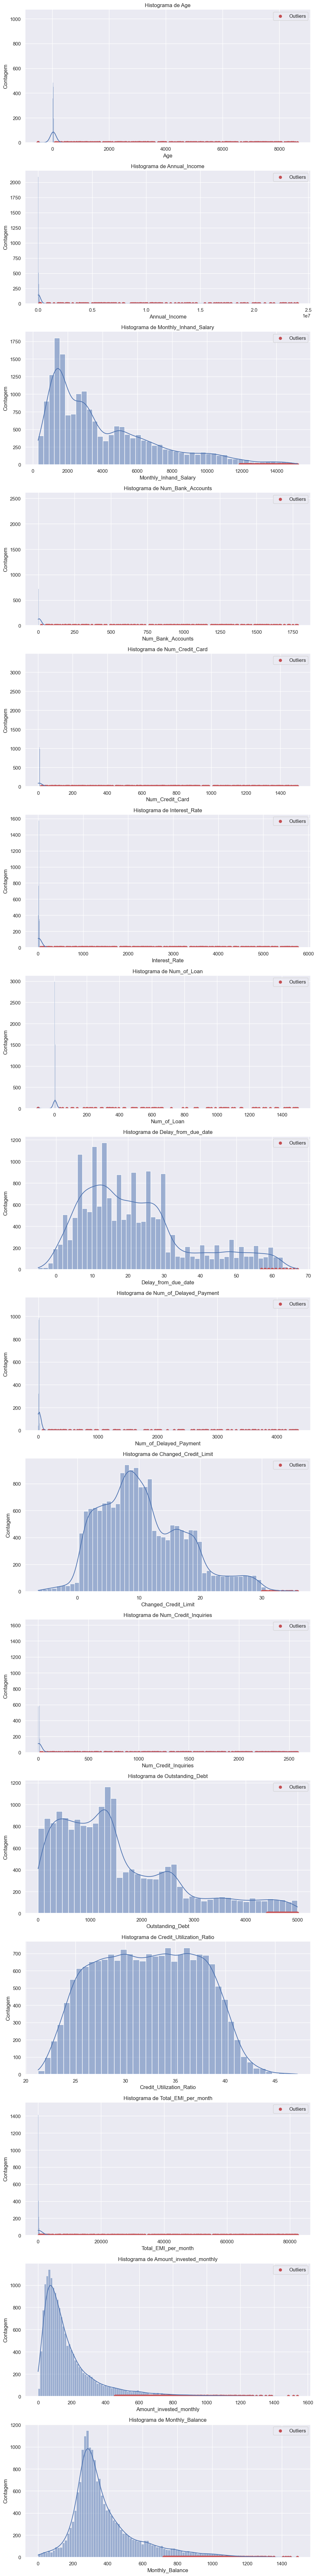

In [111]:
fig, axes = plt.subplots(nrows=len(colunas_numericas), ncols=1, figsize=(10, 5*len(colunas_numericas)))
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(data=df, x=coluna, kde=True, ax=axes[i])
    # Destacando os outliers
    outliers_data = df.loc[outliers[coluna], coluna]
    if not outliers_data.empty:
        axes[i].scatter(outliers_data, np.zeros_like(outliers_data), color='r', label='Outliers')
        axes[i].legend()
    axes[i].set_title(f'Histograma de {coluna}')
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Contagem')
plt.tight_layout()
plt.show()

# Visualizar os outliers usando um gráfico de dispersão para cada coluna númerica

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


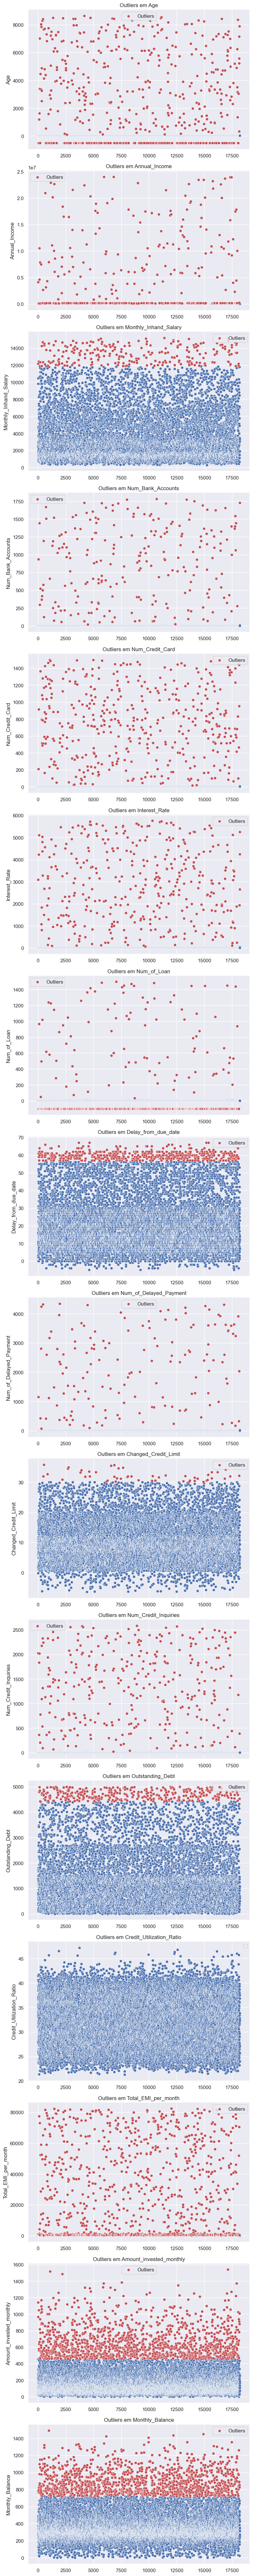

In [109]:
fig, axes = plt.subplots(nrows=len(colunas_numericas), ncols=1, figsize=(8, 5*len(colunas_numericas)))
for i, coluna in enumerate(colunas_numericas):
    sns.scatterplot(data=df, x=df.index, y=coluna, ax=axes[i], color='b')
    # Destacar outliers em vermelho
    outliers_data = df.loc[outliers[coluna], coluna]
    if not outliers_data.empty:
        sns.scatterplot(x=outliers_data.index, y=outliers_data, color='r', ax=axes[i], label='Outliers')
    axes[i].set_title(f'Outliers em {coluna}')
    axes[i].set_ylabel(coluna)
    axes[i].legend()
plt.tight_layout()
plt.show()

# Removendo os outliers

In [116]:
df_cleaned = df[~outliers.any(axis=1)].reset_index(drop=True)

# Visualizar a distribuição dos dados sem outliers usando um boxplot para cada coluna numérica

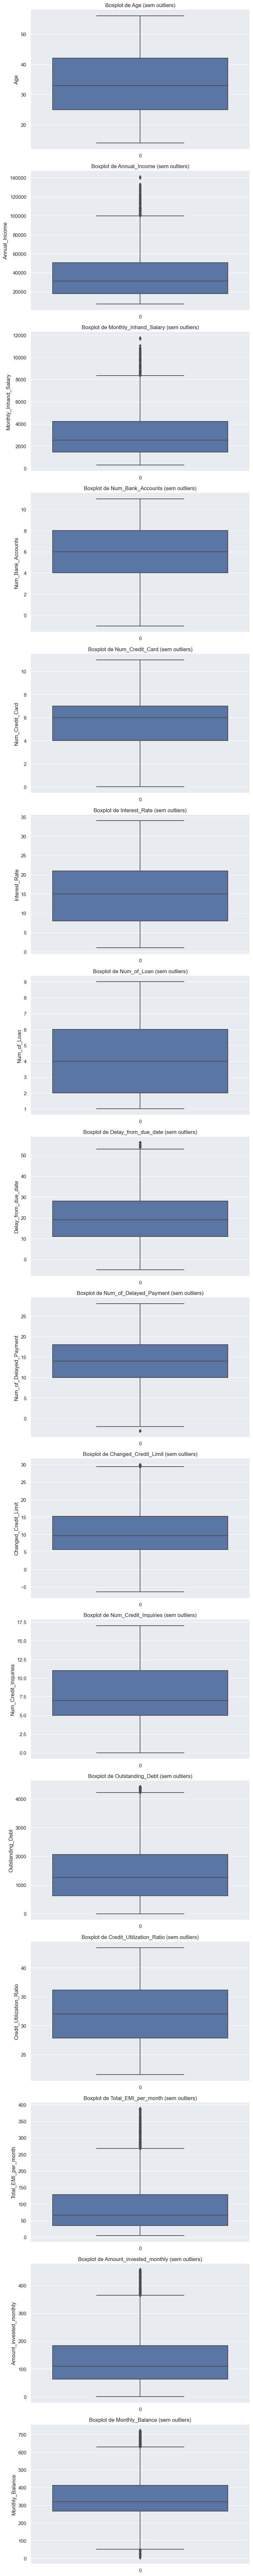

In [117]:
fig, axes = plt.subplots(nrows=len(colunas_numericas), ncols=1, figsize=(8, 5*len(colunas_numericas)))
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(data=df_cleaned[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot de {coluna} (sem outliers)')
    axes[i].set_xlabel('')  # Remover rótulo do eixo x para evitar sobreposição
    axes[i].set_ylabel(coluna)  # Usar o nome da coluna como rótulo do eixo y
plt.tight_layout()
plt.show()